# Imports

Pandas and numpy

In [1]:
import pandas as pd
import numpy as np

Visualisation

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz
from matplotlib.pyplot import figure

Preprocessing and evaluation

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

Models

In [4]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.ensemble import RandomForestClassifier as rf
from sklearn.svm import SVC as svc

from tensorflow.keras.models import Sequential #FFNN
from tensorflow.keras.layers import * #Layers
from tensorflow.keras.optimizers import Adam #SGD optimiser
from tensorflow.keras.metrics import RootMeanSquaredError #Using the RMSE to determine the residuals


# Data Exploration

In [5]:
df = pd.DataFrame(pd.read_csv("C:\Projects\Visual\Python_projects\Marketing_analysis\Marketing-Dataset.csv"))
features = df.columns.drop("row ID").drop("subscribed")
target = df.subscribed
df

,row ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
0,Row0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,Row1,56,services,married,high.school,no,no,yes,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,Row2,45,services,married,basic.9y,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,Row3,59,admin.,married,professional.course,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,Row4,41,blue-collar,married,unknown,unknown,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26355,Row26355,29,unemployed,single,basic.4y,no,yes,no,cellular,nov,...,1,9,1,success,-1.1,94.767,-50.8,1.028,4963.6,0
26356,Row26356,46,blue-collar,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
26357,Row26357,56,retired,married,university.degree,no,yes,no,cellular,nov,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
26358,Row26358,44,technician,married,professional.course,no,no,no,cellular,nov,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [6]:
df.dtypes

row ID             object
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
subscribed          int64
dtype: object

Nominal attributes
* Job
* Martical
* Default
* Housing
* Loan
* Contact
* Month
* Day_of_the_week
* Poutcome
* Subscribed

Ordinal attributes
* Education

Ratio attributes
* Duration
* Campaign
* Pdays
* Previous
* Euribor3m
* Nr.employed

Interval attributes
* Emp.var.rate
* Cons.price.idx
* Cons.conf.idx

In [7]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed
count,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000,26360.000000
mean,40.055994,258.799317,2.556639,961.516161,0.173065,0.074848,93.570798,-40.490303,3.618071,5167.032845,0.112443
std,10.452764,263.562218,2.715861,189.261156,0.490529,1.576832,0.578183,4.635120,1.735283,72.089807,0.315917
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,179.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


We can look at the count of each subscribed/not-subscribed instance and their ratios to check out the balance of the dataset.

0
*23396 instances
*~88.7% of the set

1
*2964 instances
*~11.2%

In [8]:
print("0: ",df["subscribed"].value_counts()[0], df["subscribed"].value_counts()[0]/df["subscribed"].value_counts().sum())
print("1: ",df["subscribed"].value_counts()[1], df["subscribed"].value_counts()[1]/df["subscribed"].value_counts().sum())

0:  23396 0.887556904400607
1:  2964 0.11244309559939301


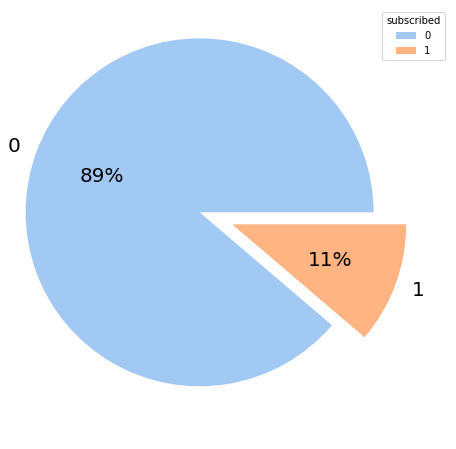

In [9]:
plt.figure(figsize=(8, 8))

values = df['subscribed'].value_counts().values
labels = df['subscribed'].value_counts().index
colors = sns.color_palette('pastel')[0:2]

plt.pie(
    df['subscribed'].value_counts().values,
    labels = labels,
    colors = colors,
    explode=[0.2, 0],
    autopct='%.0f%%',
    textprops={'fontsize': 20}
    )

plt.legend(
    title = "subscribed"
)

plt.show()

So as we can see, the dataset is very unbalanced. 

Although this isn't ideal, it should be noted and recognised during while we are getting results. 

We are going to drop the row ID row. 

In [10]:
df.drop("row ID", axis=1, inplace=True)

Checking for missing values, we can see that job, marital, education, default, housing and loan all contain missing values.

In [11]:
df.isna().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
subscribed        False
dtype: bool

<AxesSubplot:>

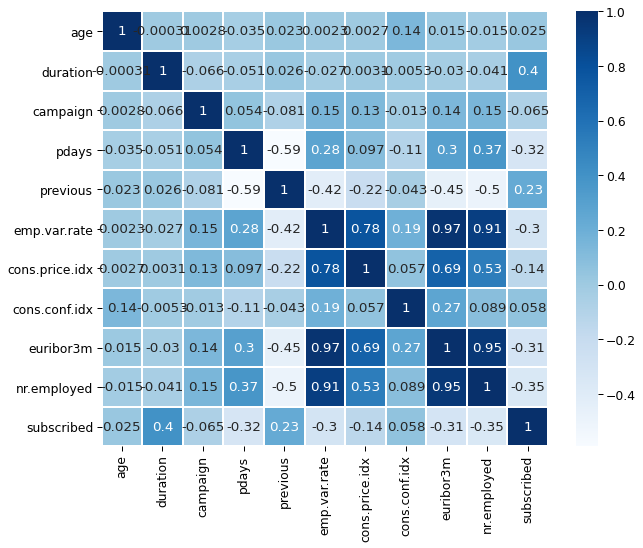

In [12]:
plt.figure(figsize=(10,8))
sns.set_context('paper', font_scale=1.4)

sns.heatmap(
    df.corr(), 
    annot=True, 
    cmap='Blues',
    linewidths=.2)

We can see interesting correlations. 

There is a strong positive correlation between being subscribed and duration and previous contact. 

There are strongly negative correlation between being subscribed and pdays (number of days passed after the client was last contacted from a previous contact), emp.var.rate, euribor3m, nr.employed. 

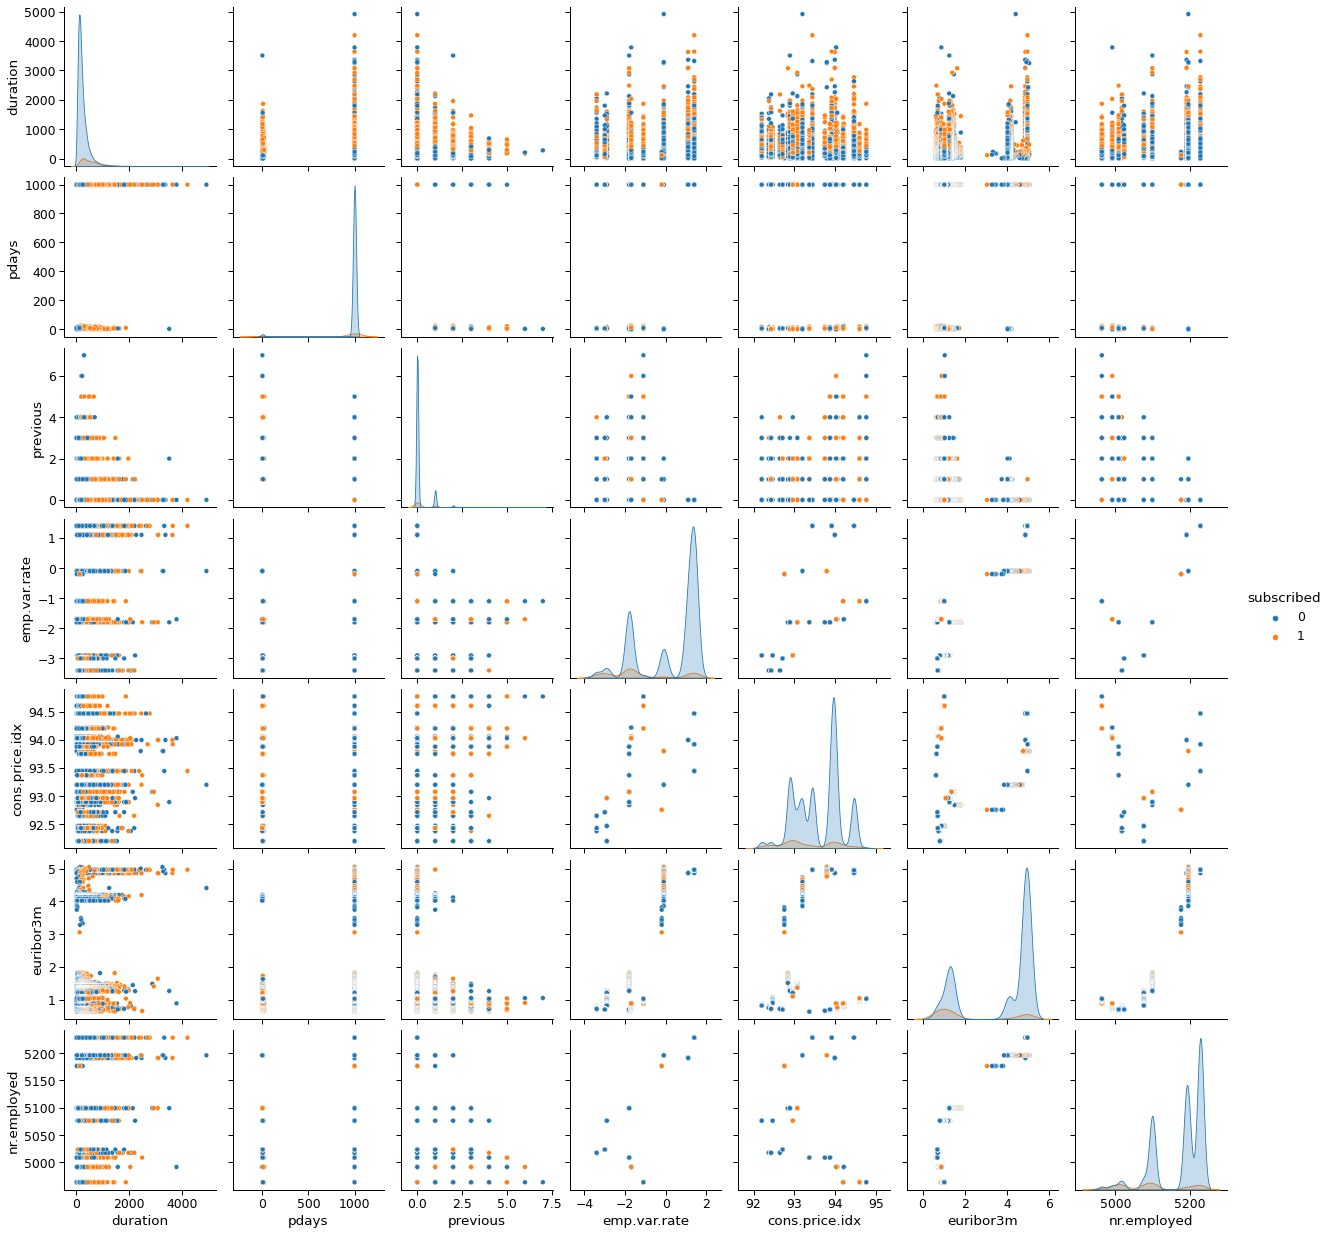

In [13]:
sns.pairplot(
    df[['duration', 
    'pdays', 
    'previous', 
    'emp.var.rate', 
    'cons.price.idx', 
    'euribor3m', 
    'nr.employed', 
    'subscribed']]
    , hue='subscribed')

4918
179.0


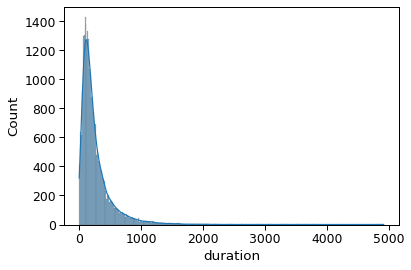

In [14]:
sns.histplot(
    df['duration'],
    kde=True)

print(np.max(df.duration))
print(np.median(df.duration))

In [15]:
len(df[df.duration > 179][df.subscribed == 1]) / len(df[df.subscribed == 1]) #Ratio of subscribed members where the duration is greater than the median

C:\Users\CL-11\AppData\Local\Temp/ipykernel_30288/1220985388.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  len(df[df.duration > 179][df.subscribed == 1]) / len(df[df.subscribed == 1]) #Ratio of subscribed members where the duration is greater than the median


0.8751686909581646

Duration has the highest positive correlation so it is worth looking into a bit deeper. 
* Max = 4918
* Median = 179

We checked the ratio of subscribed members where the duration is greater than the median. It showed that ~88% of successfully subscribed calls occured after a call longer than the duration of the median duration. 

A good hypothesis to investigate would be 'as duration of the calls increase, so does the chance that the customer would subscribe'.

# Data Preparation

In [16]:
df.drop('subscribed', inplace=True, axis=1)
df.replace('unknown', pd.NA, inplace=True, regex=True)

We can start getting into the data preparation. Going through each of the previously mentioned attributes, we can start preprocessing. 

While preprocessing, we should create some simple functions to save time when preprocessing the unknown dataset. 

Job

In [17]:
def pre_process_job(df):  
    job_dummy = pd.get_dummies(df.job)
    df.drop('job', axis=1, inplace=True)
    df = pd.concat([df, job_dummy], axis=1)
    return df

df['job'].isna().sum() #A minor 0.08% (212) here is na so lets drop these
df = df[df['job'].notna()]

df = pre_process_job(df)

c:\Python39\lib\site-packages\pandas\core\frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Marital  

In [18]:
def pre_process_marital(df):
    marital_dummy = pd.get_dummies(df.marital)
    df.drop('marital', inplace=True, axis=1)
    df = pd.concat([df, marital_dummy], axis=1)
    return df

df['marital'].isna().sum() #These cannot really be replaced so it is best to drop these 51 occurences
df = df[df['marital'].notna()]

df = pre_process_marital(df)

Education

In [19]:
def pre_process_education(df):
    df['education'].replace("illiterate", 0, inplace=True, regex=True)
    df['education'].replace("basic.4y", 1, inplace=True, regex=True)
    df['education'].replace("basic.6y", 2, inplace=True, regex=True)
    df['education'].replace("basic.9y", 3, inplace=True, regex=True)
    df['education'].replace("high.school", 4, inplace=True, regex=True)
    df['education'].replace("professional.course", 5, inplace=True, regex=True)
    df['education'].replace("university.degree", 6, inplace=True, regex=True)
    return df

df = df[df['education'].notna()] #Drop all the remaining rows with nan, as this column is important to consider

df = pre_process_education(df)

Default

In [20]:
df.drop("default", axis=1, inplace=True)

Housing and loan

In [21]:
df["housing"].value_counts()

yes    13292
no     11198
Name: housing, dtype: int64

Every instance where housing is a NAN value, is where loan is also NAN. 
There are 624 instances like this and because it is binary, it is not safe to simply replace them with an average or a guesstimate. 
Here these instances should be dropped. 

In [22]:
df[df['housing'].isna()][df['loan'].isna()]

C:\Users\CL-11\AppData\Local\Temp/ipykernel_30288/2353928684.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df[df['housing'].isna()][df['loan'].isna()]


,age,education,housing,loan,contact,month,day_of_week,duration,campaign,pdays,...,management,retired,self-employed,services,student,technician,unemployed,divorced,married,single
51,51,1,<NA>,<NA>,telephone,may,mon,212,1,999,...,0,0,0,0,0,0,0,0,1,0
249,59,1,<NA>,<NA>,telephone,may,tue,437,1,999,...,1,0,0,0,0,0,0,0,1,0
259,48,4,<NA>,<NA>,telephone,may,tue,152,1,999,...,0,0,0,1,0,0,0,0,1,0
314,36,6,<NA>,<NA>,telephone,may,tue,176,2,999,...,0,0,0,0,0,0,0,0,1,0
352,50,1,<NA>,<NA>,telephone,may,tue,153,1,999,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26179,57,6,<NA>,<NA>,cellular,oct,wed,229,2,3,...,0,0,0,0,0,0,0,0,1,0
26190,60,1,<NA>,<NA>,cellular,oct,fri,272,1,10,...,0,1,0,0,0,0,0,0,1,0
26212,66,1,<NA>,<NA>,cellular,oct,wed,216,1,6,...,0,1,0,0,0,0,0,0,1,0
26244,31,6,<NA>,<NA>,cellular,oct,tue,192,1,3,...,0,0,0,0,0,0,0,0,0,1


In [23]:
def preprocess_housing_loan(df):
    df = df[df['housing'].notna()]
    df = df[df['loan'].notna()]
    return df

df = preprocess_housing_loan(df)

contact

In [24]:
def pre_process_contact(df):
    df.replace('telephone', 1, inplace=True)
    df.replace('cellular', 0, inplace=True)
    
    return df

df = pre_process_contact(df)

month

In [25]:
def pre_process_month(df):
    df['month'].isna().sum()

    months = ['jan', 'feb', 'mar', 'apr',
              'may', 'jun', 'jul', 'aug',
             'sep', 'oct', 'nov', 'dec']

    i = 1
    for m in months:
        df.month.replace(m, i, inplace=True)
        i+=1
    return df

df = pre_process_month(df)

day_of_week

In [26]:
def pre_process_day(df):
    df['day_of_week'].isna().sum()

    days = ['mon', 'tue', 'wed',
           'thu', 'fri', 'sat',
           'sun']
    i = 1
    for d in days:
        df.day_of_week.replace(d, i, inplace=True)
        i+=1
    return df

df = pre_process_day(df)

poutcome

In [27]:
def pre_process_poutcome(df):
    df.poutcome.value_counts() #nonexistent:21132, fail:2533, success:825
    poutcome_dummy = pd.get_dummies(df.poutcome)
    df.drop('poutcome', inplace=True, axis=1)
    df = pd.concat([df, poutcome_dummy], axis=1)
    
    return df
    
df =  pre_process_poutcome(df)

In [28]:
pd.set_option('display.max_columns', None)

In [29]:
df['subscribed'] = target
df.replace("yes", 1, inplace=True)
df.replace("no", 0, inplace=True)

# Data analysis

## Train and test sets

In [30]:
features, target = list(df.iloc[:,:-1].columns), list(df.iloc[:,-1:].columns)

X, y = df.drop(target, axis=1), df[target]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [31]:
nu_features = {
    0:features[0], 1:features[1], 2:features[2],
    3:features[3], 4:features[4], 5:features[5],
    6:features[6], 7:features[7], 8:features[8],
    9:features[9], 10:features[10], 
     
    11:features[11],
    12:features[12], 13:features[13], 14:features[14],
    15:features[15], 16:features[16], 17:features[17],
    18:features[18], 19:features[19], 20:features[20],
     
    21:features[21],
    22:features[22], 23:features[23], 24:features[24],
    25:features[25], 26:features[26], 27:features[27],
    28:features[28], 29:features[29], 30:features[30],
     
    31:features[31], 32:features[32]
 }

X_train = pd.DataFrame(X_train).rename(columns=nu_features)
y_train = pd.DataFrame(y_train).rename(columns={0:"subscribed"})

## Classifiers

### DT

DTs are capable of accurate classification while being simplistic and intuitive. DTs create a tree, starting from a root, creating branches with decision splits and leaf nodes which act as output predictions. This is done with the ID3 algorithm which checks each instance attribute with a statistical test to see how it does. 

The criterion used was entropy instead of gini. Entropy, the measure of uncertainty, was utilised to evaluate the quality of the features. I had a much clearer idea of how to evaluate the resulting features with entropy, which is why I opted to use it. 

The depth directly affects the quality of the predictions. Experimentation with this parameter was required, as there is no ‘best’ depth, only one which provides good results. A depth of 5 generalised too much while a depth of 10 was overfitting- it was finalised at a depth of 6. This provided consistently good results with no signs of underfitting/overfitting. 


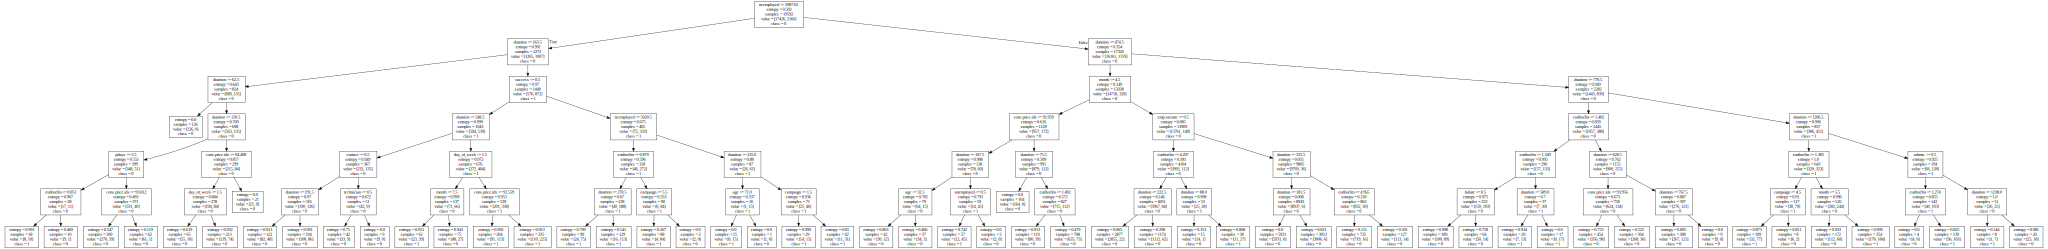

In [32]:
dt = tree.DecisionTreeClassifier(criterion="entropy",
                                 max_depth=6)
dt = dt.fit(X_train, 
               y_train)
g = tree.export_graphviz(dt, 
                        feature_names=X_train.columns,
                        class_names=['0', '1']) 
graph = graphviz.Source(g)
graph

### KNN

This technique looks at the training vectors and determines the k nearest neighbours which specifies the class. The majority of neighbours being a single class will determine the class of the new vector. The k-d tree algorithm builds a tree from the training data by splitting the data at the median values. 
The number of neighbours fit appropriately at 3. Through experimentation, this was to determine to be the best number of neighbours. Any less and it generalised too much and any more neighbours and it becomes overfit. 


In [33]:
n_neighbors = 3

algorithms = ['brute', 'kd_tree']

knn = knn(algorithm = algorithms[1],
        n_neighbors=n_neighbors)

knn.fit(X_train, y_train)

c:\Python39\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(algorithm='kd_tree', n_neighbors=3)

### RF

The random forest technique is essentially where multiple decision trees are used to improve the generalisation. The first step is to perform bootstrapping, where we randomly sample some rows into a set number of groups. Next, only a select few features are used on these groups to apply a decision tree to each group. Aggregation is then applied where an instance is passed into the trees and the majority output is our prediction. 
The parameters set were a criterion of ‘entropy’, for the same reasons as the DT; as well as setting the max-depth to unlimited. The risk in unlimiting the depth is overfitting, this was not happening, however. The accuracy of the training set, testing set and Kaggle submission score all increased with the depth. 


In [34]:
rf = rf(criterion = "entropy",
       max_depth=20)

rf.fit(X_train, y_train)

C:\Users\CL-11\AppData\Local\Temp/ipykernel_30288/2654058757.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=20)

### SVR

This approach is almost as simple as the KNN approach. Here, the classifier determines a line of best fit known as the hyperplane. SVC looks at the closes points in each class to each other, known as the support vectors then finds hyperplane which gives the maximum margin from both support vectors. Whichever side the data point lies on will determine the class. 

The parameters for the classification included the regularisation parameter (C) and the kernel. The regularisation parameter was set to 50- this high value punishes the model severely for misclassification. This causes the model to choose smaller margins. The potential kernels include linear, polynomial, RBF, sigmoid and precomputed. The kernel used was linear. Through experimentation, sigmoid and linear provided the best results.


In [35]:
svc = svc(kernel = 'linear',
         C = 1,
         gamma='scale')

svc.fit(X_train, y_train)

c:\Python39\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVC(C=1, kernel='linear')

### NN

Using tensorflow, implementing a feed-forward neural network is trivial. 

Firstly, the training data must be normalised. This can be done with the StandardScaler function. 

Then, choosing the size of the neural network. Here, it consists of 1 input layer, 1 output layer and 4 hidden layers. Its loss function is set with binary cross entropy and measued with accuracy metric. The activation functions are ReLu with sigmoid for the output layer. 

In [36]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train, X_test = scaler.transform(X_train), scaler.transform(X_test)
y_train, y_test = y_train.values, y_test.values

In [37]:
fnn_model = Sequential([
    InputLayer(X_train.shape[1]),
    Dense(16, 'relu'),
    Dense(8, 'relu'),
    Dense(4, 'relu'),
    Dense(2, 'relu'),
    Dense(1, 'sigmoid')
])

opt = Adam(learning_rate=0.01)

fnn_model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy'])

history = fnn_model.fit(x=X_train, 
          y=y_train, 
          validation_split=0.1,
          batch_size = 32, 
          epochs=50)

Epoch 1/50
551/551 [==============================] - 1s 828us/step - loss: 0.2831 - accuracy: 0.8900 - val_loss: 0.2369 - val_accuracy: 0.8842
Epoch 2/50
551/551 [==============================] - 0s 578us/step - loss: 0.2084 - accuracy: 0.9015 - val_loss: 0.2233 - val_accuracy: 0.9041
Epoch 3/50
551/551 [==============================] - 0s 578us/step - loss: 0.2004 - accuracy: 0.9093 - val_loss: 0.2178 - val_accuracy: 0.9041
Epoch 4/50
551/551 [==============================] - 0s 573us/step - loss: 0.1963 - accuracy: 0.9097 - val_loss: 0.2146 - val_accuracy: 0.9046
Epoch 5/50
551/551 [==============================] - 0s 597us/step - loss: 0.1937 - accuracy: 0.9121 - val_loss: 0.2139 - val_accuracy: 0.9051
Epoch 6/50
551/551 [==============================] - 0s 586us/step - loss: 0.1915 - accuracy: 0.9124 - val_loss: 0.2137 - val_accuracy: 0.9077
Epoch 7/50
551/551 [==============================] - 0s 669us/step - loss: 0.1902 - accuracy: 0.9123 - val_loss: 0.2158 - val_accuracy:

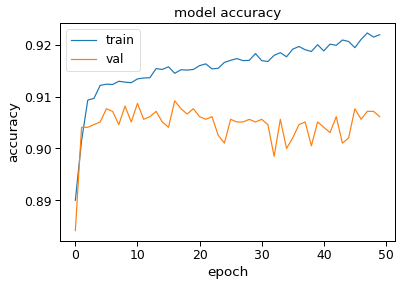

In [38]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

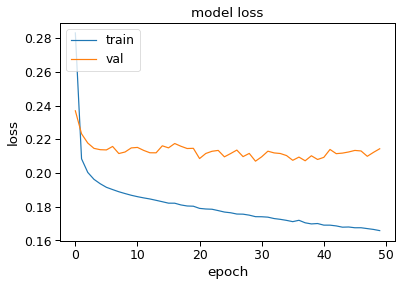

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Over the epochs, accuracy goes up and loss goes down. This is a nicely fit neural network. The epochs are set to such so that it does not overfit. 

## Evaluation

We are now ready to evaluate the 5 models. This is done with 2 methods here.
* Accuracy
* Confusion matrices

In [40]:
dt_accuracy = dt.score(X_test, y_test)
print(dt_accuracy)

print(confusion_matrix(y_test, dt.predict(X_test)))

#[0,0] = TN
#[1,0] = FN
#[0,1] = FP
#[1,1] = TP

print(classification_report(y_test, dt.predict(X_test)))

0.8864842792976725
[[4342    0]
 [ 556    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4342
           1       0.00      0.00      0.00       556

    accuracy                           0.89      4898
   macro avg       0.44      0.50      0.47      4898
weighted avg       0.79      0.89      0.83      4898



c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
knn_accuracy = knn.score(X_test, y_test)
print(knn_accuracy)

print(confusion_matrix(y_test, knn.predict(X_test)))

print(classification_report(y_test, knn.predict(X_test)))

0.8864842792976725
[[4342    0]
 [ 556    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4342
           1       0.00      0.00      0.00       556

    accuracy                           0.89      4898
   macro avg       0.44      0.50      0.47      4898
weighted avg       0.79      0.89      0.83      4898



c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
rf_accuracy = rf.score(X_test, y_test)
print(rf_accuracy)

print(confusion_matrix(y_test, rf.predict(X_test)))

print(classification_report(y_test, rf.predict(X_test)))

0.8924050632911392
[[4308   34]
 [ 493   63]]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      4342
           1       0.65      0.11      0.19       556

    accuracy                           0.89      4898
   macro avg       0.77      0.55      0.57      4898
weighted avg       0.87      0.89      0.86      4898



In [43]:
svc_accuracy = svc.score(X_test, y_test)
print(svc_accuracy)

print(confusion_matrix(y_test, svc.predict(X_test)))

print(classification_report(y_test, svc.predict(X_test)))

0.8864842792976725
[[4342    0]
 [ 556    0]]
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      4342
           1       0.00      0.00      0.00       556

    accuracy                           0.89      4898
   macro avg       0.44      0.50      0.47      4898
weighted avg       0.79      0.89      0.83      4898



c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python39\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
_, fnn_accuracy = fnn_model.evaluate(X_test, y_test)
print(fnn_accuracy)


print(confusion_matrix(y_test, (fnn_model.predict(X_test) > 0.5)*1))

print(classification_report(y_test, (fnn_model.predict(X_test) > 0.5)*1))

154/154 [==============================] - 0s 404us/step - loss: 0.2118 - accuracy: 0.9047
0.9046549797058105
[[4180  162]
 [ 305  251]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4342
           1       0.61      0.45      0.52       556

    accuracy                           0.90      4898
   macro avg       0.77      0.71      0.73      4898
weighted avg       0.90      0.90      0.90      4898



In [45]:
acc = pd.DataFrame()
acc["DT"] = [dt_accuracy]
acc["KNN"] = [knn_accuracy]
acc["RF"] = [rf_accuracy]
acc["SVC"] = [svc_accuracy]
acc["FNN"] = [fnn_accuracy]
acc

,DT,KNN,RF,SVC,FNN
0,0.886484,0.886484,0.892405,0.886484,0.904655


Having a look at these, the accuracy of the models is very good. ~88-90% across the board. This is because when using regression models, it is usually the case that which one you choose is no where near as important as how you prepare the data.

The confusion matrices reveal the problem we noted before- the lack of balance in the data. Ofcourse, the accuracy is still good, however, trying to predict a 'Yes'/'1' response is very difficult for all the models. 